#notebook setup

In [0]:
!pip install google-auth --upgrade
!pip install grpcio --upgrade 

Requirement already up-to-date: google-auth in /usr/local/lib/python3.6/dist-packages (1.10.0)
Requirement already up-to-date: grpcio in /usr/local/lib/python3.6/dist-packages (1.26.0)


In [0]:
!pip install -qq tf-nightly-gpu-2.0-preview

     |████████████████████████████████| 395.5MB 38kB/s 
     |████████████████████████████████| 450kB 47.3MB/s 
     |████████████████████████████████| 3.8MB 62.5MB/s 


In [0]:
!pip freeze

absl-py==0.8.1
alabaster==0.7.12
albumentations==0.1.12
altair==4.0.0
asgiref==3.2.3
astor==0.8.1
astropy==3.0.5
atari-py==0.2.6
atomicwrites==1.3.0
attrs==19.3.0
audioread==2.1.8
autograd==1.3
Babel==2.7.0
backcall==0.1.0
backports.tempfile==1.0
backports.weakref==1.0.post1
beautifulsoup4==4.6.3
bleach==3.1.0
blis==0.2.4
bokeh==1.0.4
boto==2.49.0
boto3==1.10.40
botocore==1.13.40
Bottleneck==1.3.1
branca==0.3.1
bs4==0.0.1
bz2file==0.98
cachetools==4.0.0
certifi==2019.11.28
cffi==1.13.2
chainer==6.5.0
chardet==3.0.4
chart-studio==1.0.0
Click==7.0
cloudpickle==1.2.2
cmake==3.12.0
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.2.0
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.0
cupy-cuda101==6.5.0
cvxopt==1.2.3
cvxpy==1.0.25
cycler==0.10.0
cymem==2.0.3
Cython==0.29.14
daft==0.0.4
dask==1.1.5
dataclasses==0.7
datascience==0.10.6
decorator==4.4.1
defusedxml==0.6.0
descartes==1.1.0
dill==0.3.1.1
distributed==1.25.3
Django==3.0
dlib==19.18.0
dm-sonnet==1.3

In [0]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
tf.__version__

'2.0.0-dev20191002'

In [0]:
import sys
try:
    import ujson as json
except ImportError:
    try:
        import simplejson as json
    except ImportError:
        import json

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from sklearn.preprocessing import MinMaxScaler
import pywt
import os
from PIL import Image
# import tensorflow as tf
from glob import glob

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Model,load_model,Sequential

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout,Flatten, Input
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!/opt/bin/nvidia-smi

Tue Jan  7 20:30:20 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    32W / 250W |    265MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

# Data prep

In [0]:
%cd drive/'My Drive'
!pwd

/content/drive/My Drive
/content/drive/My Drive


In [0]:
img_folder = '/Images'
!ls 'Images'

0  1  2  3


class 0 : DYjets
class 1 : TTjets
class 2 : Wjets
class 3 : ZZjets

## Train val size setting

In [0]:
cwd = os.getcwd()
img_path = cwd + img_folder

train_val_size = 4000

df = {}
data = []
for idx, x in enumerate(os.listdir(img_path)):
  if x.isdigit() and idx < 3:
    for idx2, pic in enumerate(os.listdir(img_path+'/'+str(x))):
      if idx2 < train_val_size:
        data.append((img_path+ '/' + x + '/' + pic , x))

df = pd.DataFrame(data, columns=['filename', 'class'])
df['class'] = df['class'].astype(int)
#shuffle
df = df.sample(frac=1).reset_index(drop=True)

print(df.head())
print(len(df))
df.dtypes

                                            filename  class
0  /content/drive/My Drive/Images/1/TTjets_event_...      1
1  /content/drive/My Drive/Images/1/TTjets_event_...      1
2  /content/drive/My Drive/Images/2/Wjets_event_3...      2
3  /content/drive/My Drive/Images/0/DYjets_event_...      0
4  /content/drive/My Drive/Images/0/DYjets_event_...      0
12000


filename    object
class        int64
dtype: object

In [0]:
from collections import Counter
cnt = Counter(df['class'])
cnt

Counter({0: 4000, 1: 4000, 2: 4000})

In [0]:
# Split into train and validation sets
train_percentage = .7
val_percentage = 0.15
test_percentage = 0.15

train_length = int(len(df) * train_percentage)
df_train = df[:train_length]

val_length = int(len(df) * val_percentage)
df_val = df[train_length : train_length+val_length]

test_length = int(len(df) * test_percentage)
df_test = df[ train_length + val_length : ]

# shuffle 
df_train = df_train.sample(frac=1).reset_index(drop=True)
df_val = df_val.sample(frac=1).reset_index(drop=True)
df_test = df_test.sample(frac=1).reset_index(drop=True)

df_list = [df_train, df_val, df_test]
for df_part in df_list:
  print(len(df_part))

8400
1800
1800


In [0]:
# print(df_train)
print(set(df['class']))

{0, 1, 2}


In [0]:
# Reads an image from a file, decodes it into a tensor, and resizes it
# to a fixed shape.
img_rows, img_cols = 224,224
num_classes = len(set(df['class']))
batch_size = 128

def _parse_function(filename, label):
  image_string = tf.io.read_file(filename)
  image_decoded = tf.image.decode_jpeg(image_string)
  image_resized = tf.image.resize(image_decoded, [img_rows, img_cols])
  image_resized = tf.ensure_shape(image_resized ,shape=(img_rows, img_cols,3))
  label = tf.one_hot(label, num_classes)
  return image_resized, label

In [0]:
train_dataset = tf.data.Dataset.from_tensor_slices((tf.cast(df_train['filename'].values, tf.string),
                                                    tf.cast(df_train['class'].values, tf.int32) ))
train_dataset = train_dataset.map(_parse_function)
train_dataset = train_dataset.shuffle(5000)
train_dataset = train_dataset.repeat()
train_dataset = train_dataset.batch(batch_size, drop_remainder=True)

In [0]:
valid_dataset = tf.data.Dataset.from_tensor_slices((tf.cast(df_val['filename'].values, tf.string),
                                                    tf.cast(df_val['class'].values, tf.int32) ))
valid_dataset = valid_dataset.map(_parse_function)
valid_dataset = valid_dataset.shuffle(5000)
valid_dataset = valid_dataset.repeat()
valid_dataset = valid_dataset.batch(batch_size, drop_remainder=True)

In [0]:
test_dataset = tf.data.Dataset.from_tensor_slices((tf.cast(df_test['filename'].values, tf.string),
                                                    tf.cast(df_test['class'].values, tf.int32) ))
test_dataset = test_dataset.map(_parse_function)
test_dataset = test_dataset.shuffle(5000)
test_dataset = test_dataset.repeat()
test_dataset = test_dataset.batch(batch_size, drop_remainder=True)

In [0]:
train_dataset

<BatchDataset shapes: ((128, 224, 224, 3), (128, 3)), types: (tf.float32, tf.float32)>

In [0]:
valid_dataset

<BatchDataset shapes: ((128, 224, 224, 3), (128, 3)), types: (tf.float32, tf.float32)>

# inception

In [0]:
base_inception = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3), pooling=None)

In [0]:
# add a global spatial average pooling layer
x = base_inception.output

x = GlobalAveragePooling2D()(x)

# let's add a fully-connected layer
x = Dense(512, activation='relu')(x)

x = Dropout(0.5)(x)

#x = GlobalAveragePooling2D()(x)

# let's add a fully-connected layer
x = Dense(512, activation='relu')(x)

x = Dropout(0.5)(x)

# let's add a fully-connected layer
x = Dense(512, activation='relu')(x)

x = Dropout(0.5)(x)

# and a logits layer -- let's say we have 3 classes
predictions = Dense(3, activation='softmax')(x)

In [0]:
inception_model = Model(inputs=base_inception.input, outputs=predictions)

In [0]:
inception_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 111, 111, 32) 864         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 111, 111, 32) 96          conv2d_188[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 111, 111, 32) 0           batch_normalization_188[0][0]    
____________________________________________________________________________________________

In [0]:
for layer in base_inception.layers:
    layer.trainable = False
    print(layer.name, ' Trainable =', layer.trainable)
    

input_7  Trainable = False
conv2d_188  Trainable = False
batch_normalization_188  Trainable = False
activation_188  Trainable = False
conv2d_189  Trainable = False
batch_normalization_189  Trainable = False
activation_189  Trainable = False
conv2d_190  Trainable = False
batch_normalization_190  Trainable = False
activation_190  Trainable = False
max_pooling2d_8  Trainable = False
conv2d_191  Trainable = False
batch_normalization_191  Trainable = False
activation_191  Trainable = False
conv2d_192  Trainable = False
batch_normalization_192  Trainable = False
activation_192  Trainable = False
max_pooling2d_9  Trainable = False
conv2d_196  Trainable = False
batch_normalization_196  Trainable = False
activation_196  Trainable = False
conv2d_194  Trainable = False
conv2d_197  Trainable = False
batch_normalization_194  Trainable = False
batch_normalization_197  Trainable = False
activation_194  Trainable = False
activation_197  Trainable = False
average_pooling2d_18  Trainable = False
conv2d_

In [0]:
for layer in inception_model.layers:
    print(layer.name,' Trainable =',layer.trainable)

input_7  Trainable = False
conv2d_188  Trainable = False
batch_normalization_188  Trainable = False
activation_188  Trainable = False
conv2d_189  Trainable = False
batch_normalization_189  Trainable = False
activation_189  Trainable = False
conv2d_190  Trainable = False
batch_normalization_190  Trainable = False
activation_190  Trainable = False
max_pooling2d_8  Trainable = False
conv2d_191  Trainable = False
batch_normalization_191  Trainable = False
activation_191  Trainable = False
conv2d_192  Trainable = False
batch_normalization_192  Trainable = False
activation_192  Trainable = False
max_pooling2d_9  Trainable = False
conv2d_196  Trainable = False
batch_normalization_196  Trainable = False
activation_196  Trainable = False
conv2d_194  Trainable = False
conv2d_197  Trainable = False
batch_normalization_194  Trainable = False
batch_normalization_197  Trainable = False
activation_194  Trainable = False
activation_197  Trainable = False
average_pooling2d_18  Trainable = False
conv2d_

In [0]:
#opt = tf.keras.optimizers.Adam(lr=0.001)
opt = tf.keras.optimizers.RMSprop(lr=1e-4)

# compile the model (should be done *after* setting layers to non-trainable)
inception_model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
train_steps = int(len(df)/batch_size) #total trains set / batch_size
val_steps = int(len(df_val)/batch_size)


print('train steps:',train_steps)
print('val steps:',val_steps)

train steps: 46
val steps: 7


In [0]:
epochs = 10

### Train the model with validation 
inception_history = inception_model.fit( train_dataset, steps_per_epoch = train_steps,
                   epochs = epochs,
                   validation_data = valid_dataset,
                   validation_steps = val_steps)

Train for 46 steps, validate for 7 steps
Epoch 1/10
46/46 [==============================] - 112s 2s/step - loss: 1.0681 - accuracy: 0.4331 - val_loss: 9.3817 - val_accuracy: 0.3571
Epoch 2/10
46/46 [==============================] - 21s 453ms/step - loss: 0.8809 - accuracy: 0.5688 - val_loss: 12.7614 - val_accuracy: 0.3203
Epoch 3/10
46/46 [==============================] - 32s 688ms/step - loss: 0.7727 - accuracy: 0.6174 - val_loss: 22.0767 - val_accuracy: 0.3047
Epoch 4/10
46/46 [==============================] - 21s 456ms/step - loss: 0.7191 - accuracy: 0.6512 - val_loss: 26.6182 - val_accuracy: 0.3058
Epoch 5/10
46/46 [==============================] - 30s 661ms/step - loss: 0.6816 - accuracy: 0.6641 - val_loss: 31.1755 - val_accuracy: 0.1708
Epoch 6/10
46/46 [==============================] - 21s 450ms/step - loss: 0.6614 - accuracy: 0.6870 - val_loss: 39.5757 - val_accuracy: 0.1953
Epoch 7/10
46/46 [==============================] - 21s 453ms/step - loss: 0.6513 - accuracy: 0.69

In [0]:
inception_model.trainable = True

set_trainable = False
for layer in inception_model.layers:
    if layer.name == 'conv2d_181':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [0]:
for layer in inception_model.layers:
    print(layer.name,' Trainable =',layer.trainable)

input_5  Trainable = False
conv2d  Trainable = False
batch_normalization  Trainable = False
activation  Trainable = False
conv2d_1  Trainable = False
batch_normalization_1  Trainable = False
activation_1  Trainable = False
conv2d_2  Trainable = False
batch_normalization_2  Trainable = False
activation_2  Trainable = False
max_pooling2d  Trainable = False
conv2d_3  Trainable = False
batch_normalization_3  Trainable = False
activation_3  Trainable = False
conv2d_4  Trainable = False
batch_normalization_4  Trainable = False
activation_4  Trainable = False
max_pooling2d_1  Trainable = False
conv2d_8  Trainable = False
batch_normalization_8  Trainable = False
activation_8  Trainable = False
conv2d_6  Trainable = False
conv2d_9  Trainable = False
batch_normalization_6  Trainable = False
batch_normalization_9  Trainable = False
activation_6  Trainable = False
activation_9  Trainable = False
average_pooling2d  Trainable = False
conv2d_5  Trainable = False
conv2d_7  Trainable = False
conv2d_10 

In [0]:
epochs = 50

	
es = EarlyStopping(monitor='accuracy', mode='max', verbose=1, patience=50)

# Train the model with validation 
tuned_inception_history = inception_model.fit( train_dataset, steps_per_epoch = train_steps,
                   epochs = epochs,
                   validation_data = valid_dataset,
                   validation_steps = val_steps,
                   callbacks=[es])

Train for 17 steps, validate for 2 steps
Epoch 1/50
17/17 [==============================] - 18s 1s/step - loss: 0.3618 - accuracy: 0.8463 - val_loss: 37.8424 - val_accuracy: 0.3184
Epoch 2/50
17/17 [==============================] - 12s 722ms/step - loss: 0.3589 - accuracy: 0.8421 - val_loss: 49.6048 - val_accuracy: 0.3320
Epoch 3/50
17/17 [==============================] - 18s 1s/step - loss: 0.3792 - accuracy: 0.8304 - val_loss: 59.1348 - val_accuracy: 0.3457
Epoch 4/50
17/17 [==============================] - 12s 725ms/step - loss: 0.3308 - accuracy: 0.8591 - val_loss: 57.4081 - val_accuracy: 0.3301
Epoch 5/50
17/17 [==============================] - 12s 716ms/step - loss: 0.3058 - accuracy: 0.8697 - val_loss: 110.4535 - val_accuracy: 0.3516
Epoch 6/50
17/17 [==============================] - 18s 1s/step - loss: 0.2873 - accuracy: 0.8780 - val_loss: 84.0913 - val_accuracy: 0.3477
Epoch 7/50
17/17 [==============================] - 12s 715ms/step - loss: 0.2744 - accuracy: 0.8860 - 

KeyboardInterrupt: ignored

# vgg

## basic

In [0]:
base_vgg = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3),pooling=None)

58892288/58889256 [==============================] - 5s 0us/step


In [0]:
base_vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
# add a global spatial average pooling layer
x = base_vgg.output

x = GlobalAveragePooling2D()(x)

# let's add a fully-connected layer
x = Dense(512, activation='relu')(x)

x = Dropout(0.3)(x)

# let's add a fully-connected layer
x = Dense(512, activation='relu')(x)

x = Dropout(0.3)(x)

# let's add a fully-connected layer
x = Dense(512, activation='relu')(x)

x = Dropout(0.3)(x)

# and a logits layer -- let's say we have 3 classes
predictions = Dense(3, activation='softmax')(x)

base_vgg_model = Model(inputs=base_vgg.input, outputs=predictions)

In [0]:
base_vgg_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:
for layer in base_vgg.layers:
    print(layer.name)
    layer.trainable = True

input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


In [0]:
for layer in base_vgg_model.layers:
    print(layer.name,' Trainable =',layer.trainable)

input_1  Trainable = True
block1_conv1  Trainable = True
block1_conv2  Trainable = True
block1_pool  Trainable = True
block2_conv1  Trainable = True
block2_conv2  Trainable = True
block2_pool  Trainable = True
block3_conv1  Trainable = True
block3_conv2  Trainable = True
block3_conv3  Trainable = True
block3_pool  Trainable = True
block4_conv1  Trainable = True
block4_conv2  Trainable = True
block4_conv3  Trainable = True
block4_pool  Trainable = True
block5_conv1  Trainable = True
block5_conv2  Trainable = True
block5_conv3  Trainable = True
block5_pool  Trainable = True
global_average_pooling2d_1  Trainable = True
dense_4  Trainable = True
dropout_3  Trainable = True
dense_5  Trainable = True
dropout_4  Trainable = True
dense_6  Trainable = True
dropout_5  Trainable = True
dense_7  Trainable = True


In [0]:
opt = tf.keras.optimizers.RMSprop(lr=1e-4)

# compile the model (should be done *after* setting layers to non-trainable)
base_vgg_model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
train_steps = int(len(df)/batch_size) #total trains set / batch_size
val_steps = int(len(df_val)/batch_size)
#epochs = 1

print('train steps:',train_steps)
print('val steps:',val_steps)
epochs = 50

### Train the model with validation 
vgg16_history = base_vgg_model.fit( train_dataset, steps_per_epoch = train_steps,
                   epochs = epochs,
                   validation_data = valid_dataset,
                   validation_steps = val_steps)

train steps: 70
val steps: 10
Train for 70 steps, validate for 10 steps
Epoch 1/50
70/70 [==============================] - 5050s 72s/step - loss: 1.2087 - accuracy: 0.3759 - val_loss: 0.9967 - val_accuracy: 0.6078
Epoch 2/50
70/70 [==============================] - 75s 1s/step - loss: 0.7894 - accuracy: 0.5924 - val_loss: 0.6629 - val_accuracy: 0.6609
Epoch 3/50
70/70 [==============================] - 86s 1s/step - loss: 0.6480 - accuracy: 0.6675 - val_loss: 0.5581 - val_accuracy: 0.7414
Epoch 4/50
70/70 [==============================] - 76s 1s/step - loss: 0.5768 - accuracy: 0.7189 - val_loss: 0.5109 - val_accuracy: 0.6914
Epoch 5/50
70/70 [==============================] - 85s 1s/step - loss: 0.5103 - accuracy: 0.7642 - val_loss: 0.4593 - val_accuracy: 0.8070
Epoch 6/50
70/70 [==============================] - 77s 1s/step - loss: 0.4722 - accuracy: 0.7878 - val_loss: 0.4447 - val_accuracy: 0.8094
Epoch 7/50
70/70 [==============================] - 75s 1s/step - loss: 0.4384 - accu

In [0]:
test_steps = int(len(df_test)/batch_size)

metrics = base_vgg_model.evaluate(test_dataset,
                   steps = test_steps)
print("model accuracy:",metrics[1])

NameError: ignored

## 1st unfreezing

In [0]:
base_vgg_model.trainable = True

set_trainable = False
for layer in base_vgg_model.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [0]:
for layer in base_vgg_model.layers:
    print(layer.name,layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True
global_average_pooling2d True
dense True
dropout True
dense_1 True


In [0]:


epochs = 200

	
es = EarlyStopping(monitor='accuracy', mode='max', verbose=1, patience=15)

vgg_model_filepath = 'vgg16.h5'
mcp = ModelCheckpoint(vgg_model_filepath, monitor='accuracy', save_best_only=True, mode='max')

# Train the model with validation 
tuned_vgg_history = base_vgg_model.fit( train_dataset, steps_per_epoch = train_steps,
                   epochs = epochs,
                   validation_data = valid_dataset,
                   validation_steps = val_steps,
                   callbacks=[es, mcp])

Train for 17 steps, validate for 2 steps
Epoch 1/200
17/17 [==============================] - 24s 1s/step - loss: 0.4264 - accuracy: 0.8118 - val_loss: 0.4985 - val_accuracy: 0.7871
Epoch 2/200
17/17 [==============================] - 18s 1s/step - loss: 0.3903 - accuracy: 0.8295 - val_loss: 0.5119 - val_accuracy: 0.7832
Epoch 3/200
17/17 [==============================] - 23s 1s/step - loss: 0.3957 - accuracy: 0.8284 - val_loss: 0.4664 - val_accuracy: 0.8027
Epoch 4/200
17/17 [==============================] - 18s 1s/step - loss: 0.3788 - accuracy: 0.8366 - val_loss: 0.5116 - val_accuracy: 0.7812
Epoch 5/200
17/17 [==============================] - 17s 1s/step - loss: 0.3772 - accuracy: 0.8339 - val_loss: 0.4974 - val_accuracy: 0.7812
Epoch 6/200
17/17 [==============================] - 24s 1s/step - loss: 0.3631 - accuracy: 0.8470 - val_loss: 0.4850 - val_accuracy: 0.7773
Epoch 7/200
17/17 [==============================] - 18s 1s/step - loss: 0.3543 - accuracy: 0.8502 - val_loss: 0.

KeyboardInterrupt: ignored

In [0]:
base_vgg_model.save(cwd + '/models/vgg_tuned.h5')

In [0]:
best_vgg_model = load_model(cwd + '/models/vgg_tuned.h5')

In [0]:
import pickle

with open(cwd + '/trainHistoryDict/vgg_history.p', 'wb') as file_pi:
        pickle.dump(tuned_vgg_history.history, file_pi)

In [0]:
from tensorflow.keras.models import load_model

best_vgg_model = load_model(vgg_model_filepath)

In [0]:
test_steps = int(len(df_test)/batch_size)

metrics = best_vgg_model.evaluate(test_dataset,
                   steps = test_steps)
print("model accuracy:",metrics[1])

metrics = base_vgg_model.evaluate(test_dataset,
                   steps = test_steps)
print("model accuracy:",metrics[1])

2/2 [==============================] - 3s 1s/step - loss: 0.8058 - accuracy: 0.7754
model accuracy: 0.7753906
2/2 [==============================] - 2s 1s/step - loss: 0.8219 - accuracy: 0.7852
model accuracy: 0.78515625


In [0]:
11584/15000

0.7722666666666667

# CNN

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [0]:
IMG_HEIGHT = 200
IMG_WIDTH = 200

In [0]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='sigmoid')
])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 200, 200, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 100, 100, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 100, 100, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 40000)            

In [0]:
opt = tf.keras.optimizers.RMSprop(lr=1e-4)

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
train_steps = int(len(df)/batch_size) #total trains set / batch_size
val_steps = int(len(df_val)/batch_size)


print('train steps:',train_steps)
print('val steps:',val_steps)

train steps: 14
val steps: 2


In [0]:
epochs = 10

### Train the model with validation 
inception_history = model.fit( train_dataset, steps_per_epoch = train_steps,
                   epochs = epochs,
                   validation_data = valid_dataset,
                   validation_steps = val_steps)

Train for 14 steps, validate for 2 steps
Epoch 1/10
14/14 [==============================] - 17s 1s/step - loss: 5.8621 - accuracy: 0.3304 - val_loss: 6.0557 - val_accuracy: 0.3281
Epoch 2/10
14/14 [==============================] - 10s 695ms/step - loss: 5.6985 - accuracy: 0.3331 - val_loss: 6.0557 - val_accuracy: 0.3281
Epoch 3/10
14/14 [==============================] - 16s 1s/step - loss: 5.8707 - accuracy: 0.3379 - val_loss: 5.9352 - val_accuracy: 0.3340
Epoch 4/10
14/14 [==============================] - 10s 699ms/step - loss: 5.6770 - accuracy: 0.3345 - val_loss: 5.9051 - val_accuracy: 0.3340
Epoch 5/10
14/14 [==============================] - 16s 1s/step - loss: 5.8362 - accuracy: 0.3290 - val_loss: 5.8750 - val_accuracy: 0.3418
Epoch 6/10
14/14 [==============================] - 10s 692ms/step - loss: 5.6985 - accuracy: 0.3284 - val_loss: 5.9352 - val_accuracy: 0.3379
Epoch 7/10
14/14 [==============================] - 10s 698ms/step - loss: 5.8061 - accuracy: 0.3373 - val_los

# Resnet 50


In [0]:
train_dataset

<BatchDataset shapes: ((32, 200, 200, 3), (32, 3)), types: (tf.float32, tf.float32)>

In [0]:
input_shapes = (224,224,3)

resnet_50 = tf.keras.applications.ResNet50(
    include_top=True,
    weights='imagenet',
    input_shape=input_shapes,
    pooling=None
)

102973440/102967424 [==============================] - 1s 0us/step


In [0]:
resnet_50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [0]:
x = resnet_50.output

# x = GlobalAveragePooling2D()(x)

# let's add a fully-connected layer
x = Dense(512, activation='relu')(x)

x = Dropout(0.5)(x)

#x = GlobalAveragePooling2D()(x)

# let's add a fully-connected layer
x = Dense(512, activation='relu')(x)

x = Dropout(0.5)(x)

# let's add a fully-connected layer
x = Dense(512, activation='relu')(x)

x = Dropout(0.5)(x)

# and a logits layer -- let's say we have 3 classes
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs = resnet_50.input, outputs = predictions)

In [0]:
num_classes = 3
x = resnet_50.output
# x = GlobalAveragePooling2D()(x)
# x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation= 'softmax')(x)
model = Model(inputs = resnet_50.input, outputs = predictions)

In [0]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
train_steps = int(len(df)/batch_size) #total trains set / batch_size
val_steps = int(len(df_val)/batch_size)


print('train steps:',train_steps)
print('val steps:',val_steps)

train steps: 23
val steps: 3


In [0]:
valid_dataset

<BatchDataset shapes: ((256, 224, 224, 3), (256, 3)), types: (tf.float32, tf.float32)>

In [0]:
epochs = 10

#Train the model with validation
history = model.fit( train_dataset, steps_per_epoch = train_steps, epochs = epochs, validation_data = valid_dataset, validation_steps = val_steps)

Train for 23 steps, validate for 3 steps
Epoch 1/10
 1/23 [>.............................] - ETA: 2:30:05

ResourceExhaustedError: ignored

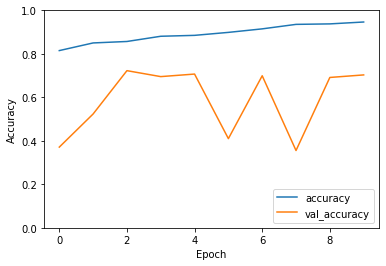

In [0]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')


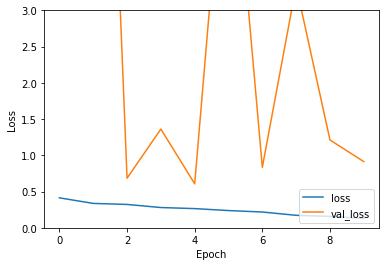

In [0]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 3])
plt.legend(loc='lower right')

# vgg19


In [0]:
base_vgg19 = tf.keras.applications.VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3),pooling=None)

In [0]:
base_vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
# add a global spatial average pooling layer
x = base_vgg19.output

x = GlobalAveragePooling2D()(x)

# let's add a fully-connected layer
x = Dense(512, activation='relu')(x)

x = Dropout(0.3)(x)

# let's add a fully-connected layer
x = Dense(512, activation='relu')(x)

x = Dropout(0.3)(x)

# let's add a fully-connected layer
x = Dense(512, activation='relu')(x)

x = Dropout(0.3)(x)

# and a logits layer -- let's say we have 3 classes
predictions = Dense(3, activation='softmax')(x)

vgg_model = Model(inputs=base_vgg19.input, outputs=predictions)

In [0]:
vgg_model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:
opt = tf.keras.optimizers.RMSprop(lr=1e-4)

# compile the model (should be done *after* setting layers to non-trainable)
vgg_model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
for layer in vgg_model.layers:
    print(layer.name,' Trainable =',layer.trainable)

input_5  Trainable = True
block1_conv1  Trainable = True
block1_conv2  Trainable = True
block1_pool  Trainable = True
block2_conv1  Trainable = True
block2_conv2  Trainable = True
block2_pool  Trainable = True
block3_conv1  Trainable = True
block3_conv2  Trainable = True
block3_conv3  Trainable = True
block3_conv4  Trainable = True
block3_pool  Trainable = True
block4_conv1  Trainable = True
block4_conv2  Trainable = True
block4_conv3  Trainable = True
block4_conv4  Trainable = True
block4_pool  Trainable = True
block5_conv1  Trainable = True
block5_conv2  Trainable = True
block5_conv3  Trainable = True
block5_conv4  Trainable = True
block5_pool  Trainable = True
global_average_pooling2d_4  Trainable = True
dense_17  Trainable = True
dropout_13  Trainable = True
dense_18  Trainable = True
dropout_14  Trainable = True
dense_19  Trainable = True
dropout_15  Trainable = True
dense_20  Trainable = True


In [0]:
train_steps = int(len(df)/batch_size) #total trains set / batch_size
val_steps = int(len(df_val)/batch_size)
#epochs = 1

print('train steps:',train_steps)
print('val steps:',val_steps)
epochs = 50

### Train the model with validation 
vgg19_history = vgg_model.fit( train_dataset, steps_per_epoch = train_steps,
                   epochs = epochs,
                   validation_data = valid_dataset,
                   validation_steps = val_steps)

train steps: 70
val steps: 10
Train for 70 steps, validate for 10 steps
Epoch 1/50
70/70 [==============================] - 97s 1s/step - loss: 0.7232 - accuracy: 0.6167 - val_loss: 0.5910 - val_accuracy: 0.7078
Epoch 2/50
70/70 [==============================] - 86s 1s/step - loss: 0.5233 - accuracy: 0.7406 - val_loss: 0.5740 - val_accuracy: 0.7227
Epoch 3/50
70/70 [==============================] - 97s 1s/step - loss: 0.5062 - accuracy: 0.7625 - val_loss: 0.4841 - val_accuracy: 0.7703
Epoch 4/50
70/70 [==============================] - 85s 1s/step - loss: 0.4960 - accuracy: 0.7626 - val_loss: 0.5102 - val_accuracy: 0.7664
Epoch 5/50
70/70 [==============================] - 95s 1s/step - loss: 0.4792 - accuracy: 0.7719 - val_loss: 0.5271 - val_accuracy: 0.7422
Epoch 6/50
70/70 [==============================] - 87s 1s/step - loss: 0.4563 - accuracy: 0.7848 - val_loss: 0.4874 - val_accuracy: 0.7781
Epoch 7/50
70/70 [==============================] - 85s 1s/step - loss: 0.5044 - accurac

KeyboardInterrupt: ignored

In [0]:
test_steps = int(len(df_test)/batch_size)

metrics = vgg_model.evaluate(test_dataset,
                   steps = test_steps)
print("model accuracy:",metrics[1])

10/10 [==============================] - 7s 663ms/step - loss: 0.9572 - accuracy: 0.7664
model accuracy: 0.76640624


# vgg16


In [0]:
base_vgg16 = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3),pooling=None)

58892288/58889256 [==============================] - 5s 0us/step


In [0]:
# add a global spatial average pooling layer
x = base_vgg16.output

x = GlobalAveragePooling2D()(x)

# let's add a fully-connected layer
x = Dense(512, activation='relu')(x)

x = Dropout(0.3)(x)

# let's add a fully-connected layer
x = Dense(512, activation='relu')(x)

x = Dropout(0.3)(x)

# let's add a fully-connected layer
x = Dense(512, activation='relu')(x)

x = Dropout(0.3)(x)

# and a logits layer -- let's say we have 3 classes
predictions = Dense(3, activation='softmax')(x)

vgg16_model = Model(inputs=base_vgg16.input, outputs=predictions)

In [0]:
vgg16_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
vgg16_model.trainable = True
set_trainable = False
for layer in vgg16_model.layers:
    if layer.name == 'block4_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

for layer in vgg16_model.layers:
  print(layer.name,' Trainable =',layer.trainable)

input_1  Trainable = False
block1_conv1  Trainable = False
block1_conv2  Trainable = False
block1_pool  Trainable = False
block2_conv1  Trainable = False
block2_conv2  Trainable = False
block2_pool  Trainable = False
block3_conv1  Trainable = False
block3_conv2  Trainable = False
block3_conv3  Trainable = False
block3_pool  Trainable = False
block4_conv1  Trainable = True
block4_conv2  Trainable = True
block4_conv3  Trainable = True
block4_pool  Trainable = True
block5_conv1  Trainable = True
block5_conv2  Trainable = True
block5_conv3  Trainable = True
block5_pool  Trainable = True
global_average_pooling2d_1  Trainable = True
dense_4  Trainable = True
dropout_3  Trainable = True
dense_5  Trainable = True
dropout_4  Trainable = True
dense_6  Trainable = True
dropout_5  Trainable = True
dense_7  Trainable = True


In [0]:
opt = tf.keras.optimizers.RMSprop(lr=1e-4)

# compile the model (should be done *after* setting layers to non-trainable)
vgg16_model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
train_steps = int(len(df)/batch_size) #total trains set / batch_size
val_steps = int(len(df_val)/batch_size)
#epochs = 1

print('train steps:',train_steps)
print('val steps:',val_steps)
epochs = 20

es = EarlyStopping(monitor='accuracy', mode='max', verbose=1, patience=15)

vgg_model_filepath = 'vgg16.h5'
mcp = ModelCheckpoint(vgg_model_filepath, monitor='accuracy', save_best_only=True, mode='max')

### Train the model with validation 
vgg16_history = vgg16_model.fit( train_dataset, steps_per_epoch = train_steps,
                   epochs = epochs,
                   validation_data = valid_dataset,
                   validation_steps = 10,
                   callbacks=[es, mcp])

train steps: 93
val steps: 14
Train for 93 steps, validate for 10 steps
Epoch 1/20
93/93 [==============================] - 114s 1s/step - loss: 0.2662 - accuracy: 0.8774 - val_loss: 1.0066 - val_accuracy: 0.7898
Epoch 2/20
93/93 [==============================] - 100s 1s/step - loss: 0.2565 - accuracy: 0.8777 - val_loss: 0.7446 - val_accuracy: 0.7852
Epoch 3/20
93/93 [==============================] - 112s 1s/step - loss: 0.2599 - accuracy: 0.8801 - val_loss: 0.7436 - val_accuracy: 0.8047
Epoch 4/20
93/93 [==============================] - 102s 1s/step - loss: 0.2481 - accuracy: 0.8825 - val_loss: 0.6192 - val_accuracy: 0.8047
Epoch 5/20
93/93 [==============================] - 109s 1s/step - loss: 0.2632 - accuracy: 0.8875 - val_loss: 0.5736 - val_accuracy: 0.8016
Epoch 6/20
93/93 [==============================] - 104s 1s/step - loss: 0.2265 - accuracy: 0.8947 - val_loss: 0.9120 - val_accuracy: 0.7984
Epoch 7/20
93/93 [==============================] - 99s 1s/step - loss: 0.2581 - a

In [0]:
vgg16_model = load_model(vgg_model_filepath)
test_steps = int(len(df_test)/batch_size)

metrics = vgg16_model.evaluate(test_dataset,
                   steps = test_steps)
print("model accuracy:",metrics[1])

14/14 [==============================] - 1030s 74s/step - loss: 1.1920 - accuracy: 0.7746
model accuracy: 0.7745536
